Bernat Sort Rufat

MD005 Sistemas Basados en el Conocimiento

# Ejercicio 3.11: Clustering (K-means)

## Librerías 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE

from scipy.stats import mode
from scipy.spatial.distance import cdist

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Objetivo

<U>Objetivo<U>:
    
- Clasificar con el método KMeans los datasets Iris, Breast Cancer y Digits propios de la librería scikit-learn. 
- Decidir y justificar la k utilizada. 
- Pintar con el uso de la librería pyplot la clasificación asignando un color a cada cluster. 
- Mostrar la matriz de confusión y comentar los resultados obtenidos.

## Iris dataset

In [2]:
# Load iris dataset from scikit-learn library
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- iris.DESCR es un atributo del objeto del conjunto de datos iris cargado desde la biblioteca scikit-learn, que proporciona una descripción del conjunto de datos. 


In [142]:
#Checking the dataset
print(iris.data.shape)

(150, 4)


In [144]:
# check the targets
print(iris.target_names)

print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [145]:
# Checking the featues
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# Create a pandas dataframe
X = pd.DataFrame(iris.data, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])
y = pd.DataFrame(iris.target, columns=['Target'])

iris_df = pd.DataFrame(X, columns=X.columns)
# Add target column
iris_df['target'] = y

In [148]:
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [149]:
# nombres de las clases
iris_df['target'].unique()

array([0, 1, 2])

### EDA

In [150]:
# info de las columnas del df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   target           150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


- Observamos que el iris_df tiene 150 filas y 5 columnas. 
- Los tipos de datos de las columnas son float64 para 4 de las columnas y int64 para la columna target. 
- Todas las columnas tienen 150 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.

In [151]:
# Summary statistics
iris_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- El método df.describe() genera estadísticas descriptivas de un df. Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

- Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna del df.

- El iris datsaset contiene mediciones de 4 características (sepal length, sepal width, petal length y petal width) de 150 flores de Iris diferentes. Estas características se utilizan para distinguir entre 3 especies diferentes de Iris: Iris setosa, Iris versicolor e Iris virginica.
- Observando las estadísticas resumidas del conjunto de datos, podemos observar, por ejemplo, que los valores medios de las cuatro características están próximos a la mediana (50%), lo que indica que los datos son bastante simétricos. 

- En general, el iris_df parece bastante limpio y con un buen comportamiento, sin problemas importantes como falta de datos o valores atípicos. 


#### Pairplots & Boxplots

Creamos diagramas de pares  y boxplots para cada atributo, en los que coloreamos los puntos en función de la variable objetivo para visualizar la relación entre los atributos y la variable objetivo. Estos gráficos nos permiten visualizar la distribución de los datos, identificar posibles valores atípicos y comprender mejor las relaciones entre las características.

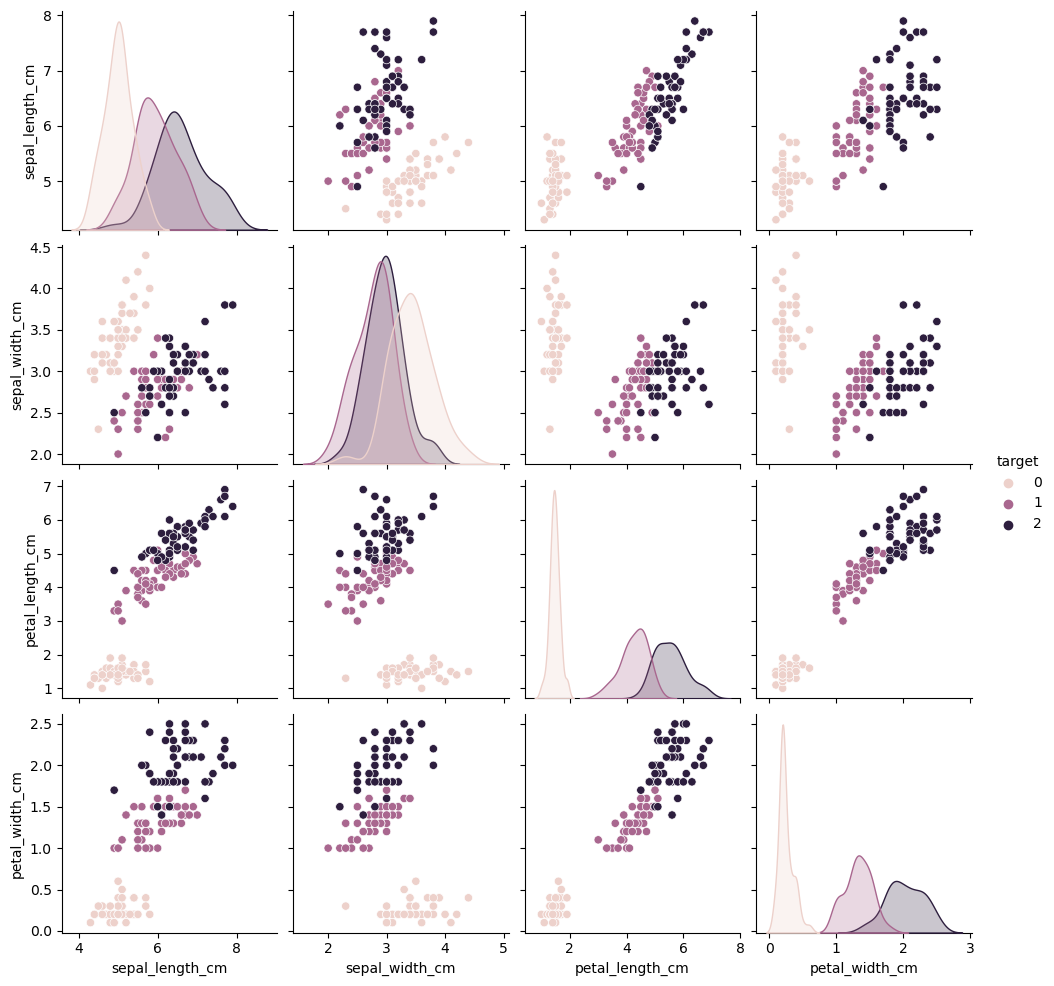

In [27]:
# Pairplot with seaborn library
sns.pairplot(iris_df, hue='target')
plt.show()

- Un pairplot es un tipo de gráfico que visualiza la relación entre múltiples variables en un conjunto de datos. 

- El pairplot crea gráficos de dispersión de todos los pares de atributos del iris_df y muestra la distribución de los datos mediante histogramas. El color de cada punto viene determinado por la clase objetivo, lo que nos permite visualizar la relación entre cada par de atributos y la clase objetivo. Además, este gráfico puede ayudarnos a identificar posibles valores atípicos. 

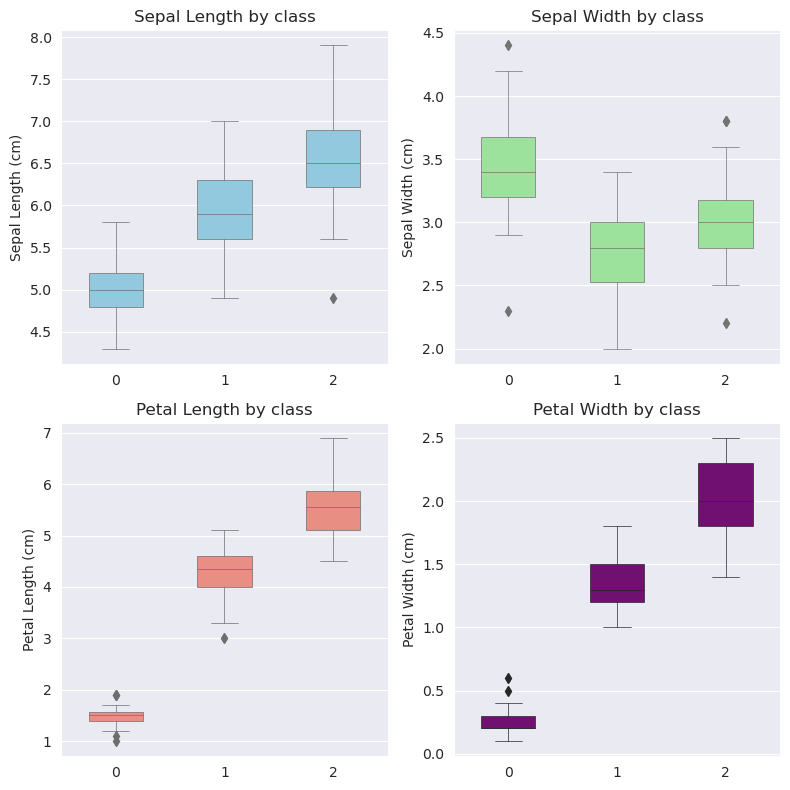

In [5]:
# Set style to ggplot2
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()

# Boxplot for each feature
sns.boxplot(data=iris_df, x='target', y='sepal_length_cm', ax=axs[0], color='skyblue',width=0.5, linewidth=0.5)
sns.boxplot(data=iris_df, x='target', y='sepal_width_cm', ax=axs[1], color='lightgreen',width=0.5, linewidth=0.5)
sns.boxplot(data=iris_df, x='target', y='petal_length_cm', ax=axs[2], color='salmon',width=0.5, linewidth=0.5)
sns.boxplot(data=iris_df, x='target', y='petal_width_cm', ax=axs[3], color='purple',width=0.5, linewidth=0.5)

# Add labels
axs[0].set_ylabel('Sepal Length (cm)', fontsize=10)
axs[1].set_ylabel('Sepal Width (cm)', fontsize=10)
axs[2].set_ylabel('Petal Length (cm)', fontsize=10)
axs[3].set_ylabel('Petal Width (cm)', fontsize=10)

# Add title to each subplot
axs[0].set_title('Sepal Length by class', fontsize=12)
axs[1].set_title('Sepal Width by class', fontsize=12)
axs[2].set_title('Petal Length by class', fontsize=12)
axs[3].set_title('Petal Width by class', fontsize=12)

# Customize axis labels
for ax in axs:
    ax.set_xlabel('')
    ax.set_xticklabels(['0', '1', '2'], fontsize=10)
    ax.tick_params(axis='both', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

- Para la longitud del sépalo, la clase setosa tiene el valor mediano más corto en comparación con las otras dos clases.

- En cuanto a la anchura de los sépalos, no parece que haya diferencias significativas en los valores medios de las tres clases.

- Para la longitud de los pétalos, la clase setosa tiene el valor mediano más corto en comparación con las otras dos clases, mientras que virginica tiene el valor mediano más largo.

- En cuanto a la anchura de los pétalos, la clase setosa tiene el valor mediano más estrecho en comparación con las otras dos clases, mientras que virginica tiene el valor mediano más ancho.

- Observamos que hay valores atípicos en los boxplots. Los valores atípicos se representan como puntos individuales fuera de los bigotes y pueden verse en algunos de los subgrupos. La presencia de valores atípicos sugiere que hay algunas muestras con valores significativamente diferentes de la mayoría de los datos de la misma clase.

#### Distribución de cada variable

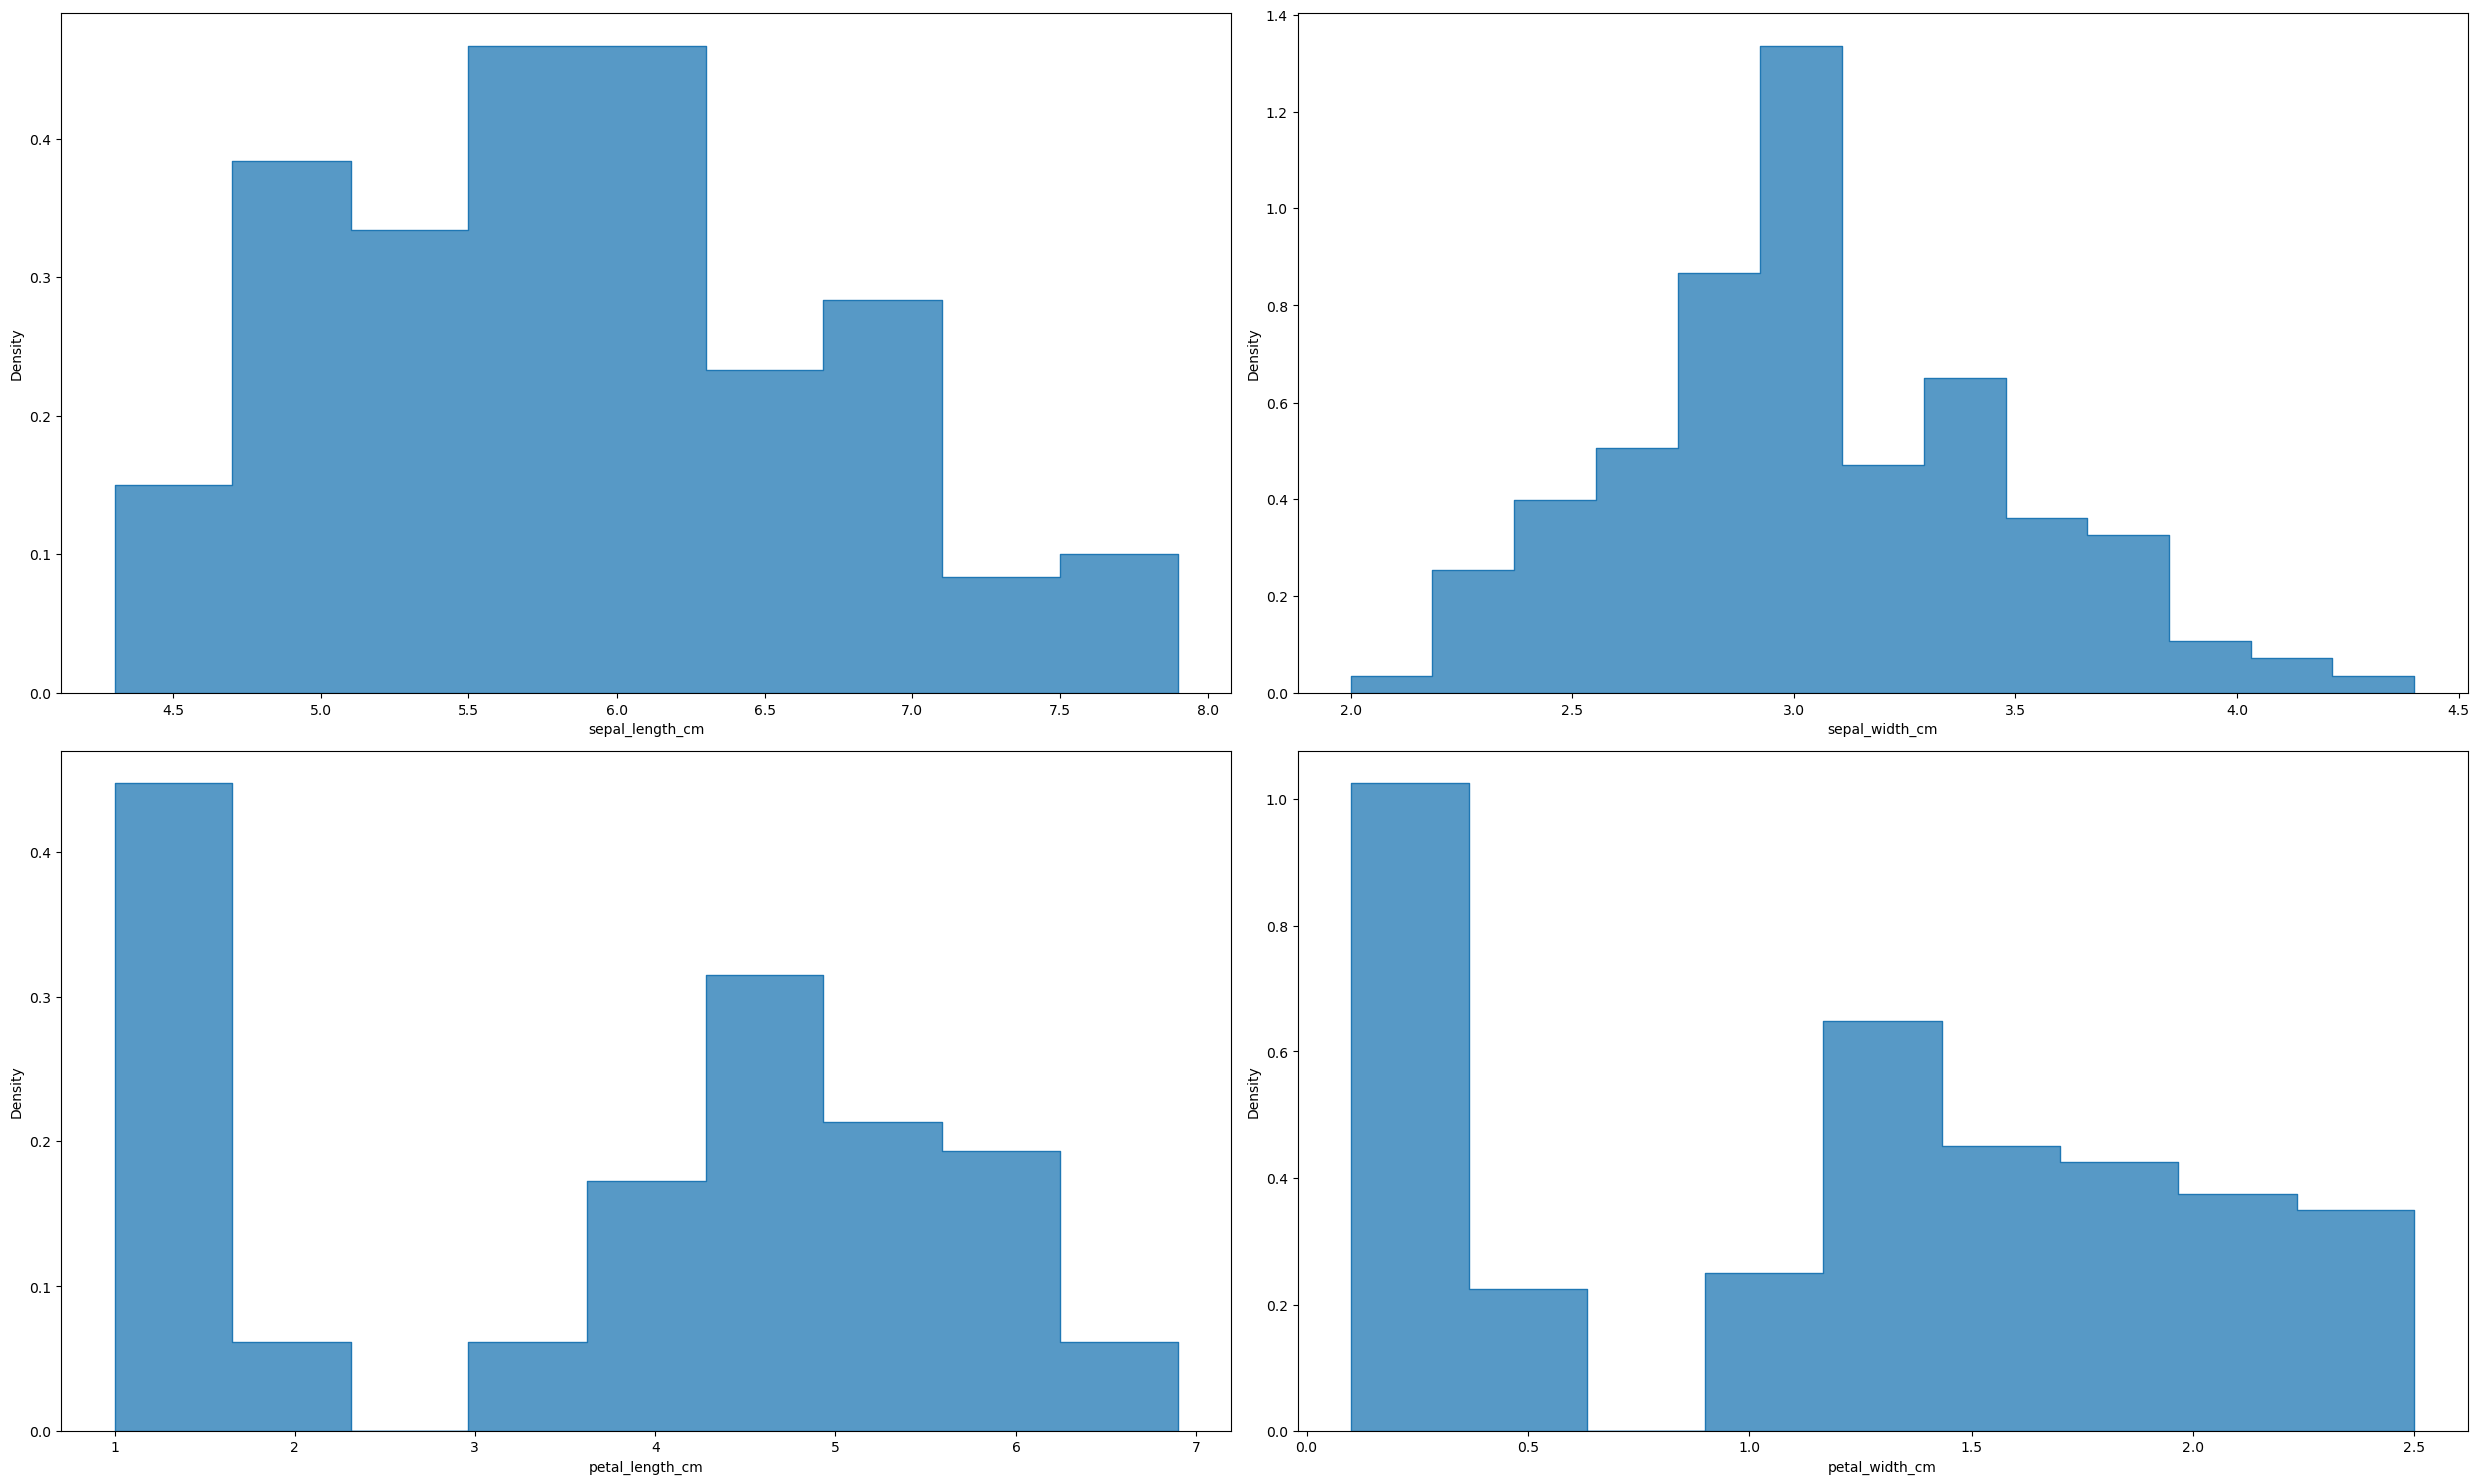

In [68]:
# creating a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))

# numeric columns
num_cols = iris_df.select_dtypes(include=[np.number])
num_col_names = num_cols.columns

# loop through the subplots and column names to plot the histograms
for i, ax in enumerate(axs.flat):
    sns.histplot(data=iris_df, x=num_col_names[i], element='step', stat='density', ax=ax)
    ax.set(xlabel=num_col_names[i], ylabel='Density')

# adjusting the spacing between the subplots
plt.tight_layout()

# showing the plot
plt.show()

- Observamos que sepal length y sepal width se distribuyen de manera más normal que petal width y petal length, que tienen una asimetría positiva. 


#### Comprobación del desequilibrio de clases

In [183]:
# Checking data imbalance 
print(iris_df['target'].value_counts()) # recuento de instancias de cada clase en el df

0    50
1    50
2    50
Name: target, dtype: int64


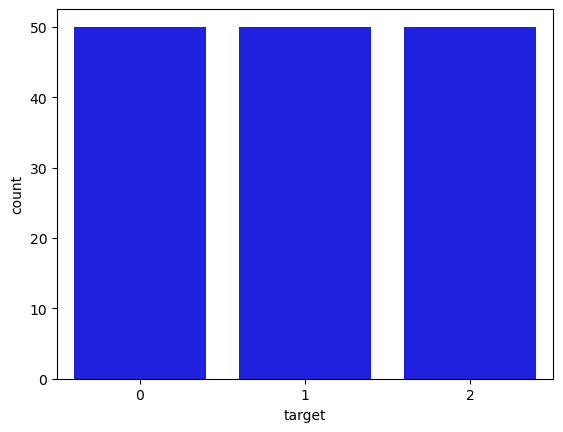

In [71]:
# plot del count
sns.countplot(x = iris_df['target'], color = 'blue')
plt.show()

- Podemos observar que el iris_df está bien equilibrado, con el mismo número de instancias (50) para cada una de las tres especies de Iris: Iris setosa, Iris versicolor e Iris virginica. 
- Esto significa que los datos se distribuyen uniformemente entre las tres clases y que no hay desequilibrio de clases (dataset balanceado).


### Scatter plot antes de K-means

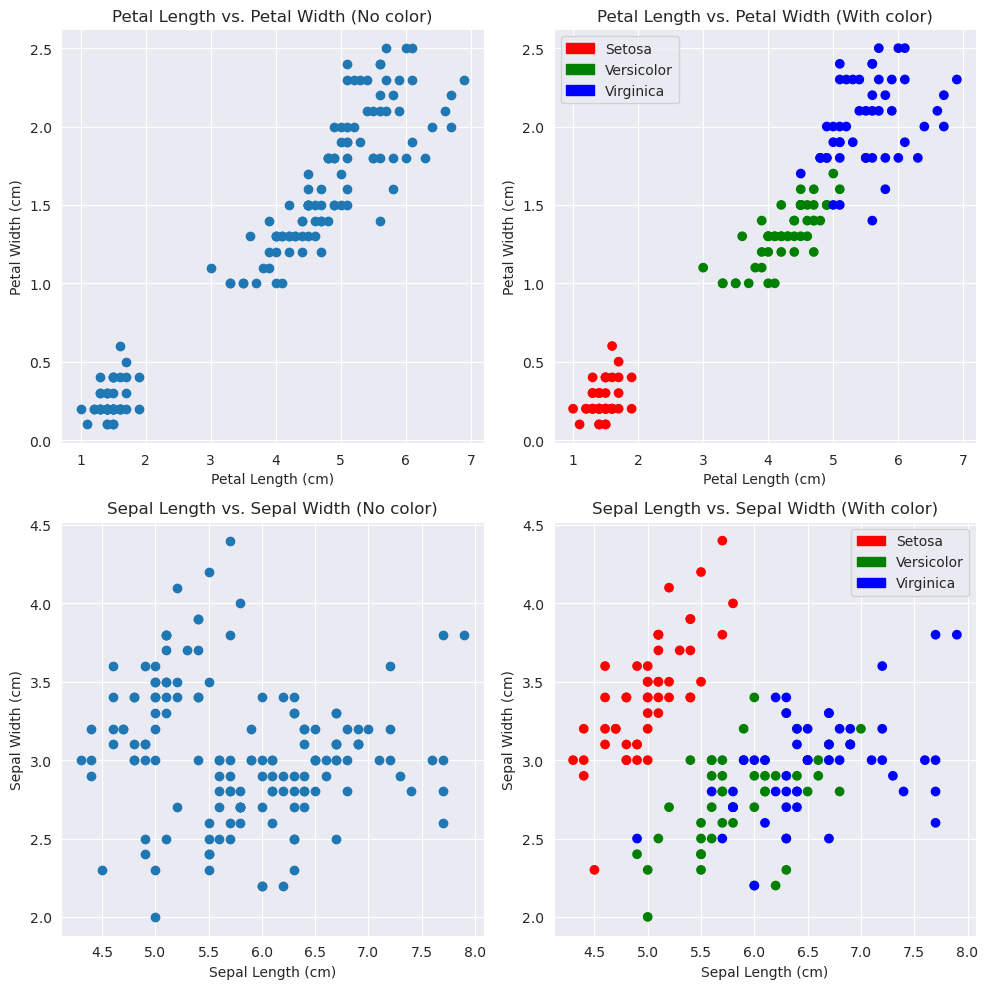

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

# Petal Length vs. Petal Width (No color)
axs[0].scatter(x=X.petal_length_cm, y=X.petal_width_cm)
axs[0].set_title("Petal Length vs. Petal Width (No color)")
axs[0].set_xlabel("Petal Length (cm)")
axs[0].set_ylabel("Petal Width (cm)")

# Petal Length vs. Petal Width (color)
color = np.array(['red','green','blue'])
axs[1].scatter(x=X.petal_length_cm, y=X.petal_width_cm, c=color[iris.target])
axs[1].set_title("Petal Length vs. Petal Width (With color)")
axs[1].set_xlabel("Petal Length (cm)")
axs[1].set_ylabel("Petal Width (cm)")
axs[1].legend(handles=[red_patch, green_patch, blue_patch])

# Sepal Length vs. Sepal Width (No color)
axs[2].scatter(x=X.sepal_length_cm, y=X.sepal_width_cm)
axs[2].set_title("Sepal Length vs. Sepal Width (No color)")
axs[2].set_xlabel("Sepal Length (cm)")
axs[2].set_ylabel("Sepal Width (cm)")

# Sepal Length vs. Sepal Width (color)
color = np.array(['red','green','blue'])
axs[3].scatter(x=X.sepal_length_cm, y=X.sepal_width_cm, c=color[iris.target])
axs[3].set_title("Sepal Length vs. Sepal Width (With color)")
axs[3].set_xlabel("Sepal Length (cm)")
axs[3].set_ylabel("Sepal Width (cm)")
axs[3].legend(handles=[red_patch, green_patch, blue_patch])


plt.tight_layout()
plt.show()

### Decisión del valor k

Para elegir el valor de k, usaremos 3 métodos:
- the elbow method
- silhouette analysis
- gap statistic

No obstante, en este caso, al ser el número de clases conocido, tendría más sentido utilizar directamente el número conocido de clases (3) como número de clusters.

#### The elbow method

- El método del codo mide la suma de distancias al cuadrado (SSE) entre los puntos y el centroide de cluster más cercano para diferentes valores de k.

- La SSE disminuirá a medida que aumente el número de clusters, porque cada punto está más cerca de su centroide asignado. Sin embargo, la disminución del SSE será menos significativa a medida que aumente el número de clusters. 
- El número óptimo de clusters es el valor de k en el que la disminución del SSE empieza a estabilizarse, lo que se representa mediante un "codo" en el gráfico de SSE frente a k.

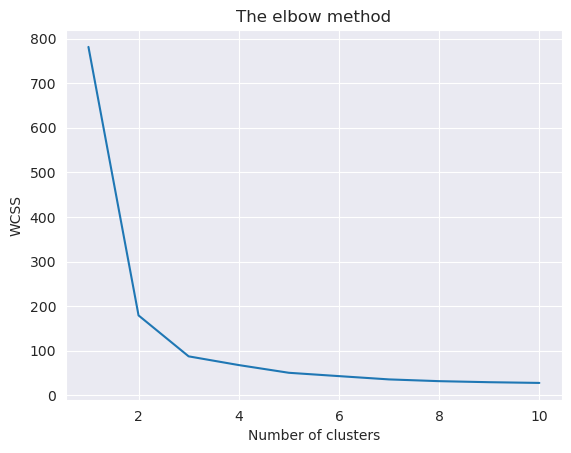

In [7]:
# Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

- Podemos ver una disminución considerable del valor de WCSS después del cluster 3. Esto significa que el número óptimo de clusters es 3.

#### Silhouette analysis

- El análisis de siluetas es un método para evaluar la calidad de la agrupación mediante el cálculo de una puntuación para cada muestra del conjunto de datos. 
- La puntuación representa la similitud de una muestra con su propio cluster en comparación con otros clusters. 
- La puntuación de la silueta oscila entre -1 y 1, donde una puntuación alta indica que la muestra está bien emparejada con su propio cluster y mal emparejada con los clusters vecinos.

In [28]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.6800825549093846
For k = 3 The average silhouette_score is : 0.5818972375239814
For k = 4 The average silhouette_score is : 0.4960222116877095
For k = 5 The average silhouette_score is : 0.5248172494203057


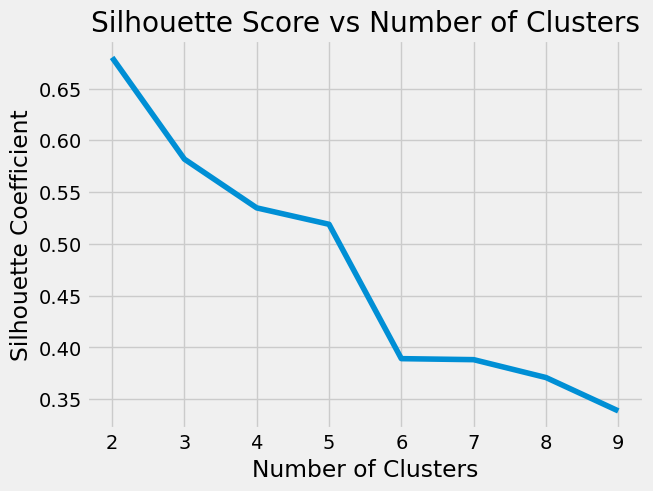

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans_d = KMeans(n_clusters=k)
    kmeans_d.fit(X)
    score = silhouette_score(X, kmeans_d.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

- Una puntuación cercana a 1 significa que la muestra está bien emparejada con su propio clúster y mal emparejada con otros clústeres, mientras que una puntuación cercana a -1 significa lo contrario.

- Los resultados muestran que cuando k es 2, la puntuación media de la silueta es 0.68, que es la más alta entre todos los valores de k probados. Cuando k aumenta a 3, 4 o 5, la puntuación de la silueta disminuye, lo que indica que las asignaciones de los grupos son menos óptimas. Esto sugiere que k=2 puede ser una buena elección para el número de clusters.

#### Gap statistic

- El gap statistic es un método para evaluar el número de clusters de un conjunto de datos comparando la suma de cuadrados dentro de un cluster de los datos observados con la esperada según una distribución de referencia nula. 
- La idea es comparar la diferencia entre la suma de cuadrados observada dentro de un cluster y la suma de cuadrados esperada dentro de un cluster para distintos valores de k (número de clusters) y elegir el número de clusters que maximice la diferencia.

In [20]:
def gap_statistic(X):
    K = range(1,4)
    meandistortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Create reference datasets
    reference_distortions = []
    for i in range(1, 4):
        X_ref = np.random.random((X.shape[0], X.shape[1]))
        kmeans_ref = KMeans(n_clusters=i, random_state=0).fit(X_ref)
        reference_distortions.append(sum(np.min(cdist(X_ref, kmeans_ref.cluster_centers_, 'euclidean'), axis=1)) / X_ref.shape[0])
        
    # Compute the gap statistic
    gap = np.log(np.array(reference_distortions)) - np.log(np.array(meandistortions))

    return K[np.argmax(gap)], gap

The optimal number of clusters is: 3


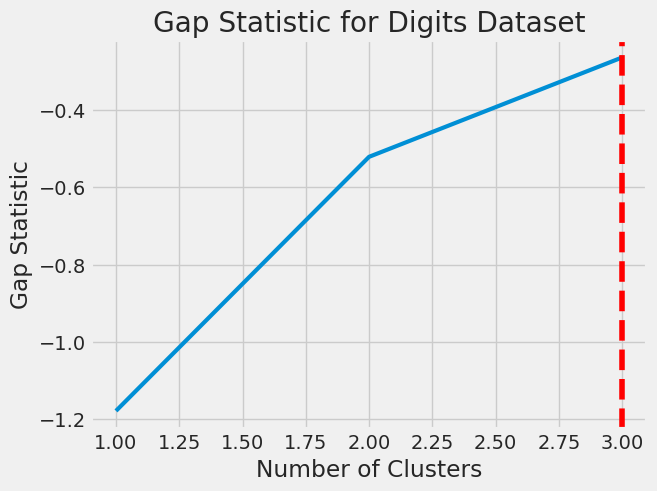

In [21]:
# Determine the optimal number of clusters
optimal_k, gap = gap_statistic(X)
print("The optimal number of clusters is:", optimal_k)

# Plot the gap statistic
plt.plot(range(1, 4), gap, linewidth=3)
plt.axvline(optimal_k, color='red', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Digits Dataset')
plt.show()

En última instancia, la decisión sobre el número de clústeres a utilizar debe guiarse por una combinación de conocimiento del dominio y de métricas de evaluación del clustering.

En este caso, utilizaremos k = 3, que es el número de clases en el iris dataset.

In [11]:
k = 3

Ahora que tenemos la cantidad óptima de clusters, podemos pasar a aplicar el K-means al Iris dataset.

### K-means

In [5]:
# Clasificar los datos utilizando el método K-means
    # k-means++:
        # Requiere más tiempo de ejecución que el k-means.
        # En vez de elegir 2 cetroides aleatoriamente, elige un centroide al azar y otro en función del cuadrado de la distancia del primero.
kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state=10)
# Entrenar el algoritmo
kmeans.fit(X)
# predicción de los valores 
y_pred = kmeans.predict(X)

In [14]:
# agrupación que ha hecho el kmeans (3 clústers): check cluster assignments
cluster_assignments = kmeans.labels_
cluster_assignments
# or y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
print(kmeans.cluster_centers_)

[[5.006      3.428      1.462      0.246      0.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]
 [6.62244898 2.98367347 5.57346939 2.03265306 2.        ]]


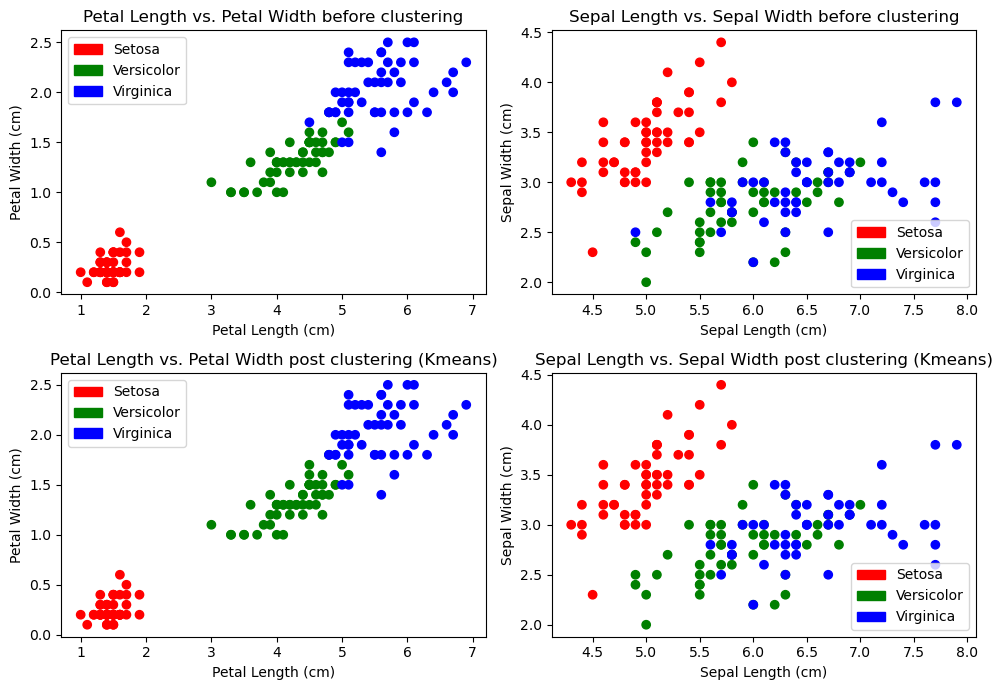

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.ravel()

iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

# Petal Length vs. Petal Width (color)
color = np.array(['red','green','blue'])
axs[0].scatter(x=X.petal_length_cm, y=X.petal_width_cm, c=color[iris.target])
axs[0].set_title("Petal Length vs. Petal Width before clustering")
axs[0].set_xlabel("Petal Length (cm)")
axs[0].set_ylabel("Petal Width (cm)")
axs[0].legend(handles=[red_patch, green_patch, blue_patch])


# Sepal Length vs. Sepal Width (color)
color = np.array(['red','green','blue'])
axs[1].scatter(x=X.sepal_length_cm, y=X.sepal_width_cm, c=color[iris.target])
axs[1].set_title("Sepal Length vs. Sepal Width before clustering")
axs[1].set_xlabel("Sepal Length (cm)")
axs[1].set_ylabel("Sepal Width (cm)")
axs[1].legend(handles=[red_patch, green_patch, blue_patch])

# Petal Length vs. Petal Width post clustering (Kmeans)
color = np.array(['red','green','blue'])
axs[2].scatter(x=X.petal_length_cm, y=X.petal_width_cm, c=color[kmeans.labels_])
axs[2].set_title("Petal Length vs. Petal Width post clustering (Kmeans)")
axs[2].set_xlabel("Petal Length (cm)")
axs[2].set_ylabel("Petal Width (cm)")
axs[2].legend(handles=[red_patch, green_patch, blue_patch])

# Sepal Length vs. Sepal Width post clustering (Kmeans)
color = np.array(['red','green','blue'])
axs[3].scatter(x=X.sepal_length_cm, y=X.sepal_width_cm, c=color[kmeans.labels_])
axs[3].set_title("Sepal Length vs. Sepal Width post clustering (Kmeans)")
axs[3].set_xlabel("Sepal Length (cm)")
axs[3].set_ylabel("Sepal Width (cm)")
axs[3].legend(handles=[red_patch, green_patch, blue_patch])

plt.tight_layout()
plt.show()

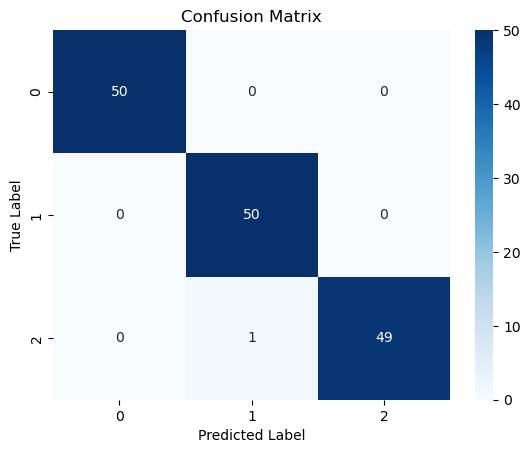

In [15]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- La matriz muestra que el clasificador fue capaz de clasificar correctamente 50 muestras de cada una de las clases "setosa" y "versicolor" (TP). 
- Para la clase "virginica", el clasificador fue capaz de clasificar correctamente 49 muestras, pero clasificó erróneamente 1 muestra como "versicolor" (FN).

In [16]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



- Observamos que la accuracy de la clasificación es del 99%, con una media ponderada de precisión, recuperación y puntuación f1 del 99%. La precisión, la recuperación y la puntuación f1 para la clase 0 (setosa) es de 1, lo que significa que el 100% de las instancias de esta clase se predicen correctamente. Lo mismo ocurre con la clase 2 (virginica), mientras que la clase 1 (versicolor) tiene una precisión del 98%.
- El clasificador está haciendo un buen trabajo al clasificar las muestras en sus categorías correctas.


## Breast Cancer Dataset

In [2]:
# Load dataset from scikit-learn library
bc = datasets.load_breast_cancer()

In [103]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- bc.DESCR es un atributo del objeto del conjunto de datos breast_cancer cargado desde la biblioteca scikit-learn, que proporciona una descripción del conjunto de datos. 


In [3]:
#Checking the dataset
print(bc.data.shape)

(569, 30)


In [162]:
# check the target
print(bc.target_names)
print(bc.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [163]:
# Checking the featues
print(bc.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Create a pandas dataframe
X_bc = pd.DataFrame(bc.data, columns=bc.feature_names)
y_bc = pd.DataFrame(bc.target, columns=['target'])

bc_df = pd.DataFrame(X_bc, columns=X_bc.columns)
# Add target column
bc_df['target'] = y_bc

In [5]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# nombres de las clases
bc_df['target'].unique()

array([0, 1])

### EDA

In [7]:
# info de las columnas del df
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- Observamos que el bc_df tiene 569 filas y 31 columnas. 
- Los tipos de datos de todas las columnas son float64 y int64 para la columna target. 
- Todas las columnas tienen 569 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.

In [8]:
# Summary statistics
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


- El método df.describe() genera estadísticas descriptivas de un df. Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

- Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna del df.
- A diferencia del iris dataset, tendremos que escalar los atributos ya que la diferencia entre el valor mínimo y máximo de los atributos es bastante grande. 

#### Distribución de cada variable

In [9]:
# nº columnas
len(bc.feature_names)

30

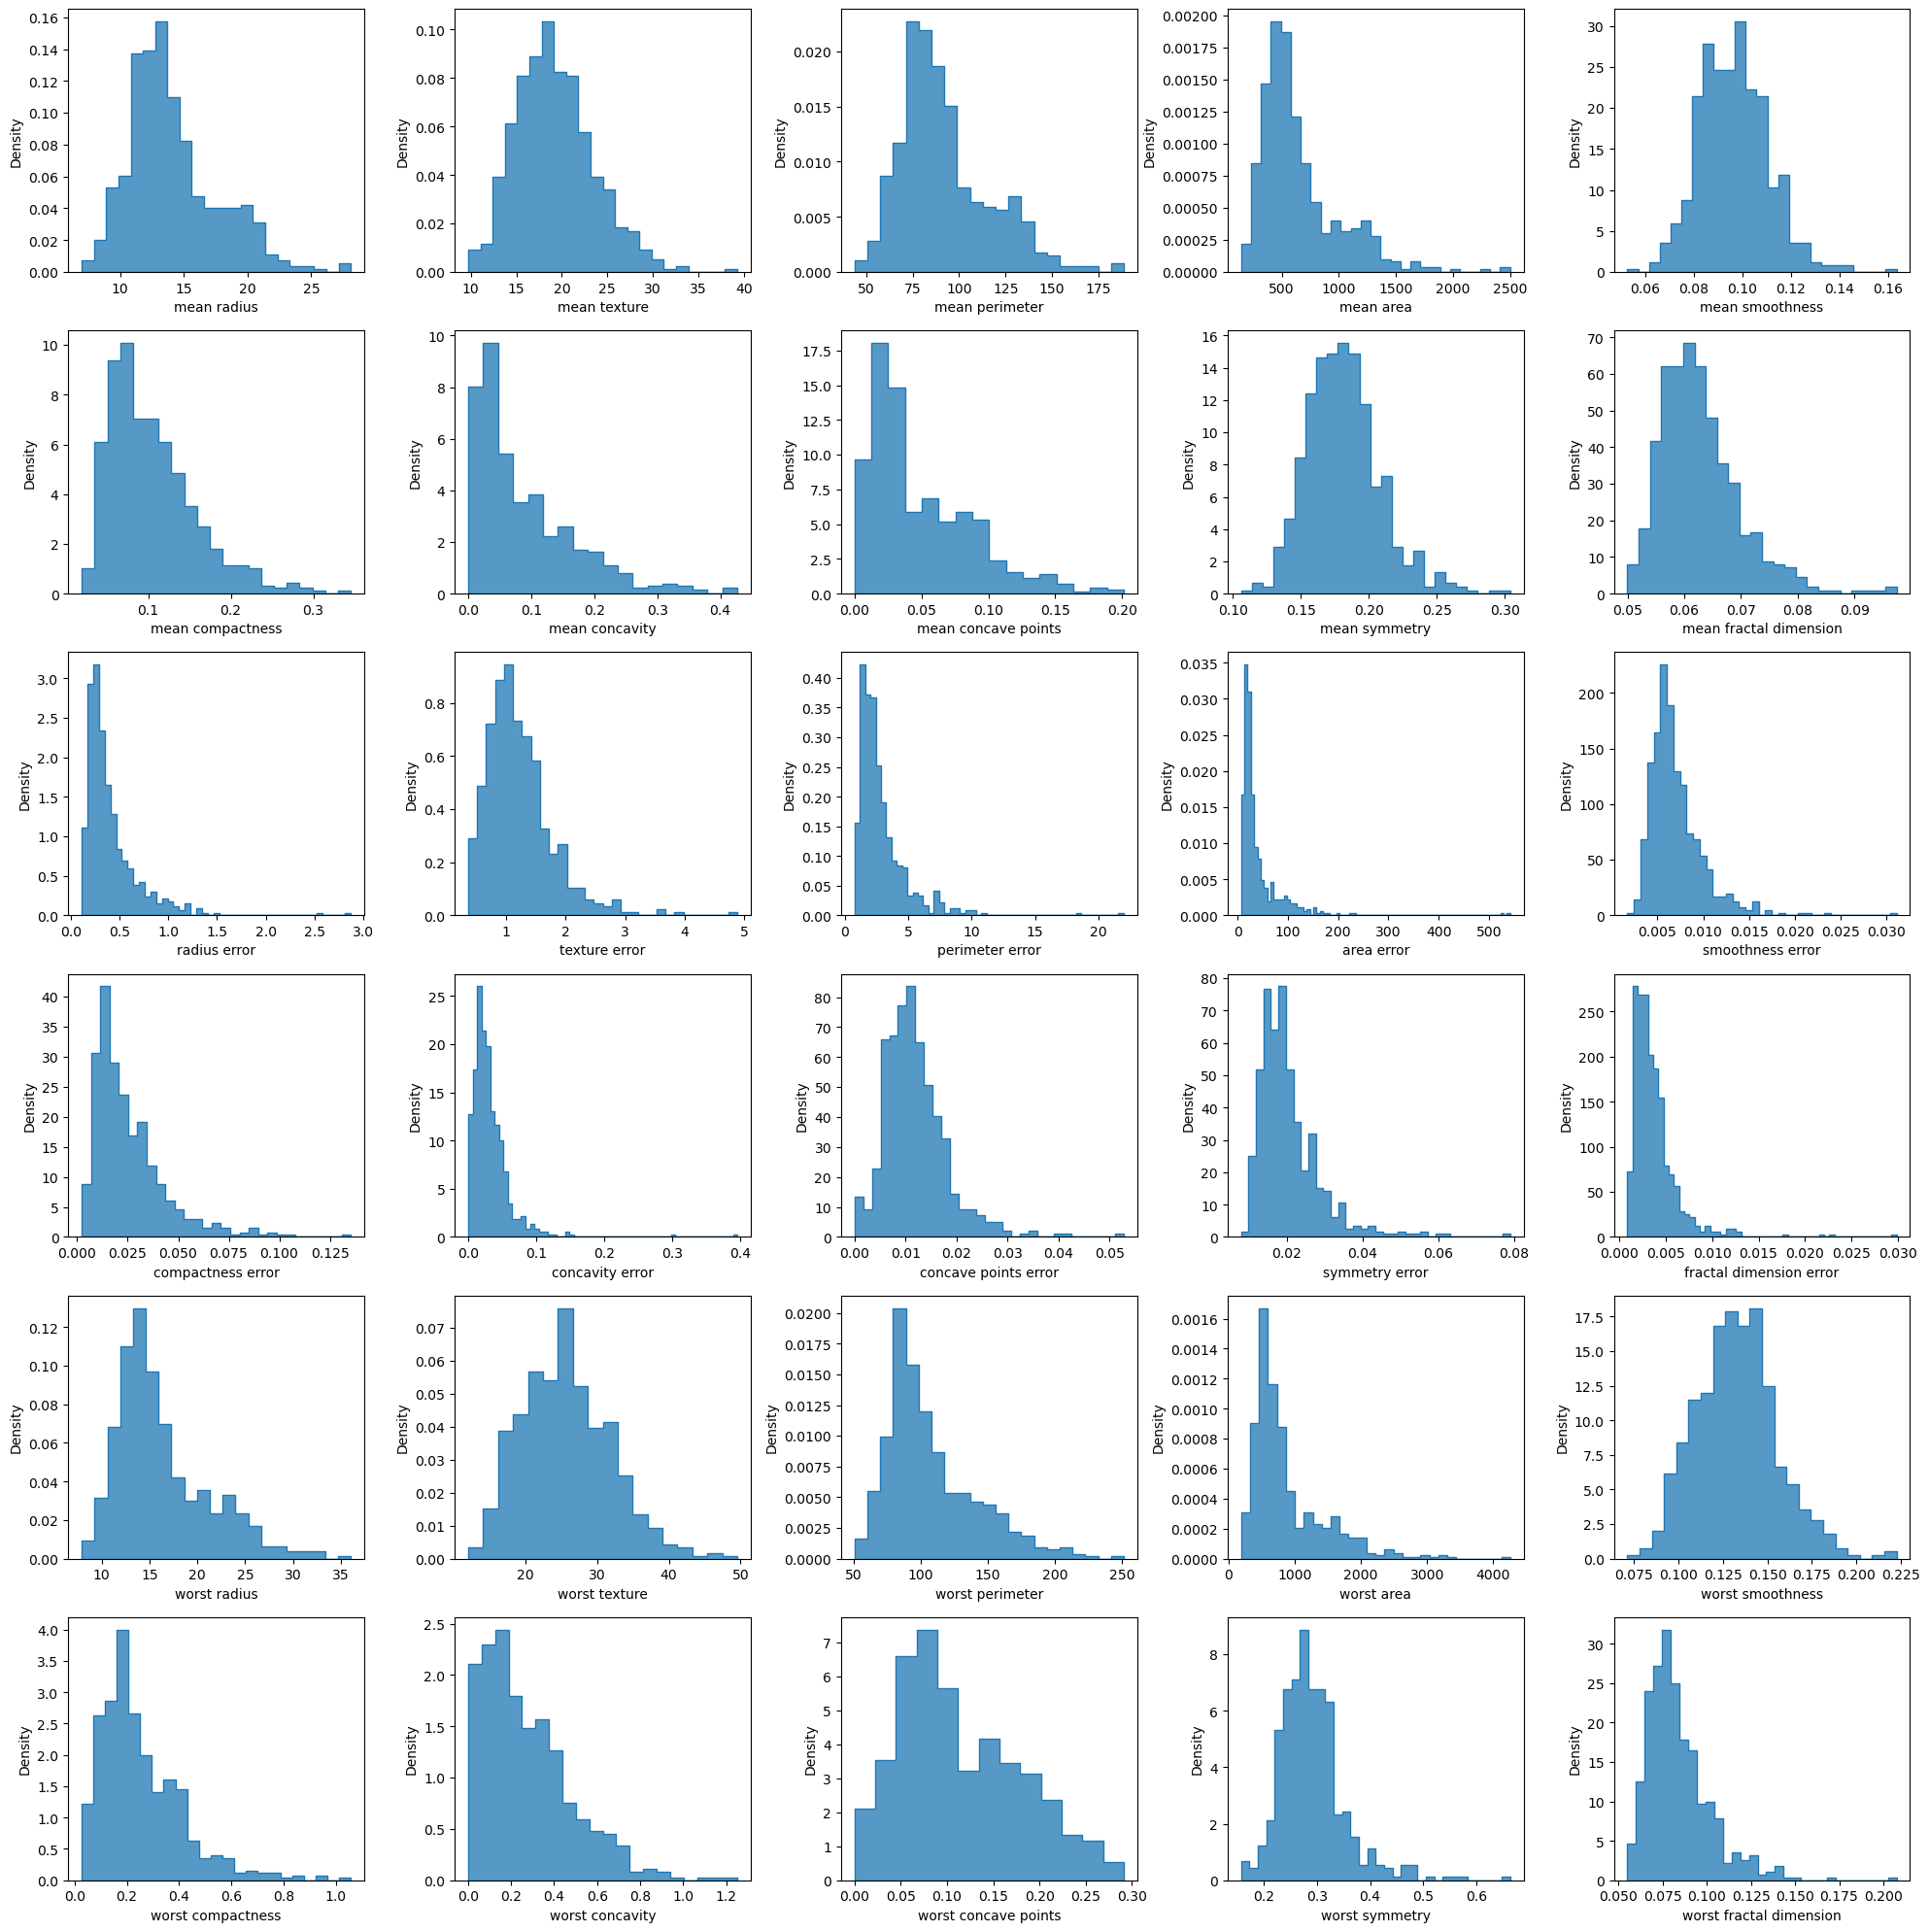

In [10]:
# creating a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

# numeric columns
num_cols = bc_df.select_dtypes(include=[np.number])
num_col_names = num_cols.columns

# loop through the subplots and column names to plot the histograms
for i, ax in enumerate(axs.flat):
    sns.histplot(data=bc_df, x=num_col_names[i], element='step', stat='density', ax=ax)
    ax.set(xlabel=num_col_names[i], ylabel='Density')

# adjusting the spacing between the subplots
plt.tight_layout()

# showing the plot
plt.show()

- Observamos que algunas variables parece que presentan una distribución normal, mientras que otras presentan una asimetría positiva.

#### Scatter plot antes de Kmeans

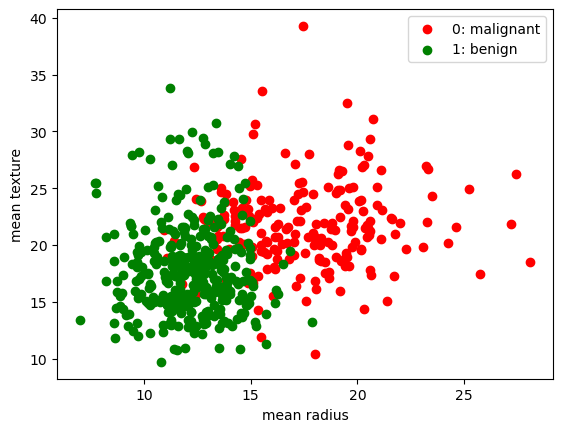

In [27]:
# Plot the first two features of the data set
plt.scatter(bc.data[bc.target==0, 0], bc.data[bc.target==0, 1], c='red', label='0: malignant')
plt.scatter(bc.data[bc.target==1, 0], bc.data[bc.target==1, 1], c='green', label='1: benign')
plt.xlabel(bc.feature_names[0])
plt.ylabel(bc.feature_names[1])

plt.legend()
plt.show()

#### Comprobación del desequilibrio de clases

In [5]:
# Checking data imbalance 
print(bc_df['target'].value_counts()) # recuento de instancias de cada clase en el df

1    357
0    212
Name: target, dtype: int64


- 1: benigno
- 0: maligno

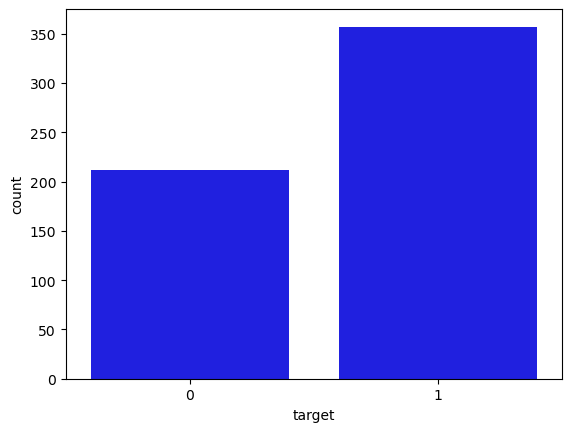

In [6]:
# plot del count
sns.countplot(x = bc_df['target'], color = 'blue')
plt.show()

- Podemos observar que hay un desequilibrio de clases.
- Vemos que la clase maligno (0) solo tiene 212 instancias, mientras que la clase benigno (1) tiene 357 instancias. 
- Este desequilibrio en el número de instancias de cada clase puede plantear problemas a la hora de entrenar y evaluar modelos de Machine Learning. Por ejemplo, un modelo que siempre predice la clase mayoritaria es probable que logre una alta accuracy, pero no será útil en la práctica, ya que no está generalizando bien.


### Oversampling con SMOTE 

- Al tratarse de datos desequilibrados, nuestro modelo podría intentar ajustarse a la clase mayoritaria y proporcionar una predicción sesgada, además de ofrecer una accuracy engañosa.
- Por este motivo, realizaremos un procedimiento de sobremuestreo en las clases minoritarias con SMOTE.

In [11]:
SMOTE = SMOTE()
X_bc_o, y_bc_o = SMOTE.fit_resample(bc.data, bc.target)

In [13]:
# miramos el resultado de sobremuestro
y1 = pd.DataFrame(y_bc_o)
y1.value_counts()

0    357
1    357
dtype: int64

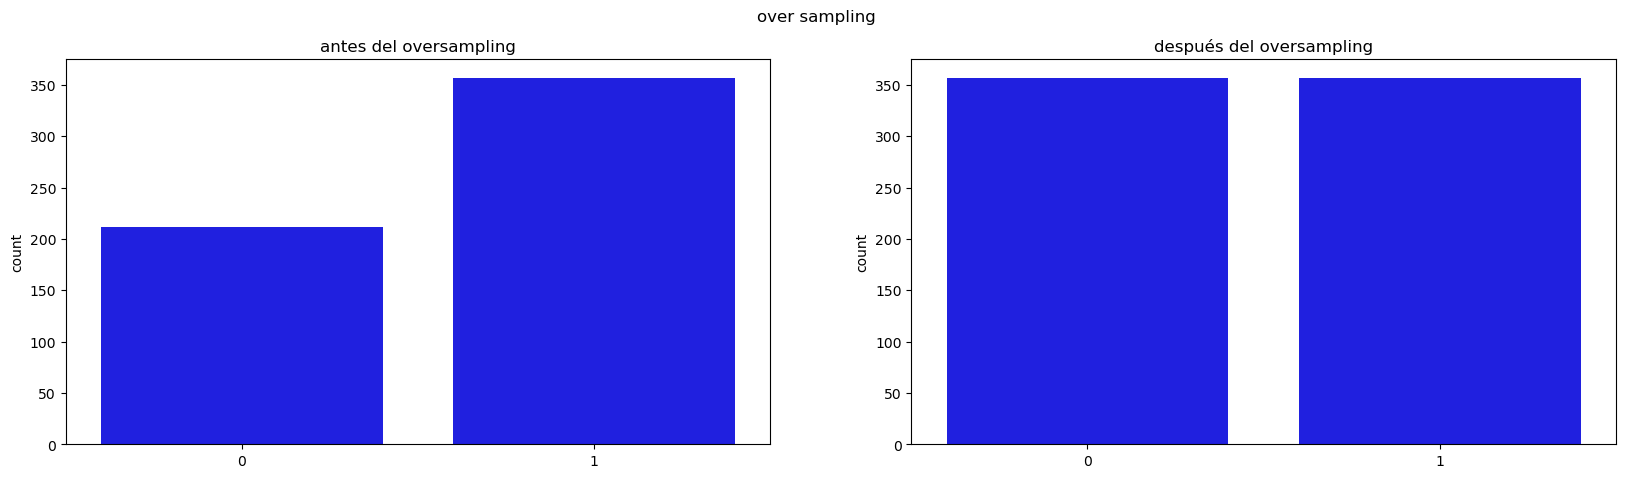

In [9]:
figure, axes = plt.subplots(1, 2, sharex=True,figsize=(20, 5))
figure.suptitle('over sampling')
axes[0].set_title('antes del oversampling')
axes[1].set_title('después del oversampling')
sns.countplot(x = bc.target, color = 'blue',ax=axes[0])
sns.countplot(x = y_bc_o, color = 'blue',ax=axes[1])
plt.show()

- Hemos incrementa de forma “sintética” los ejemplos de la clase minoritaria.
- Podemos observar que ya no hay un desequilibrio de clases, las clases están balanceadas.

### Escalar los atributos

- Escalamos los datos después de aplicar SMOTE ya que después de sobremuestrear los datos, la varianza de los datos aumentará artificialmente, por lo que el escalado puede ayudar a solucionar este problema. 
- K-means se basa en distancias entre puntos de datos y sus centroides, por lo que puede ser sensible a la escala de los datos. Si algunos atributos tienen un rango de valores mucho mayor que otros, pueden afectar a los cálculos de distancia, lo que puede llevar a asignaciones de clusters subóptimas. Escalar los datos para que todos los atributos tengan un rango similar de valores puede mitigar este problema y mejorar los resultados del algoritmo k-means.

In [14]:
scaler = StandardScaler()
scaler.fit(X_bc_o)

X_bc_scaled = scaler.transform(X_bc_o)

- Escalamos para que el algoritmo le dé la misma importancia a todos los datos.
- Algoritmos como k-means se basan en distancias entre puntos de datos y sus centroides, por lo que es importante que las features estén en la misma escala.
- El resultado es un nuevo conjunto de valores que tienen una distribución normal estándar (una distribución gaussiana con una media de 0 y una desviación estándar de 1).
- Ahora los tenemos todos dentro de un mismo rango o intervalo.
- La variable X__bc_scaled contiene la versión estandarizada de la feature data almacenada en X_bc_o.

### Decisión del valor k

Para elegir el valor de k, usaremos 3 métodos:
- the elbow method
- silhouette analysis
- gap statistic

No obstante, en este caso, al ser el número de clases conocido, tendría más sentido utilizar directamente el número conocido de clases (2) como número de clusters.

#### The elbow method


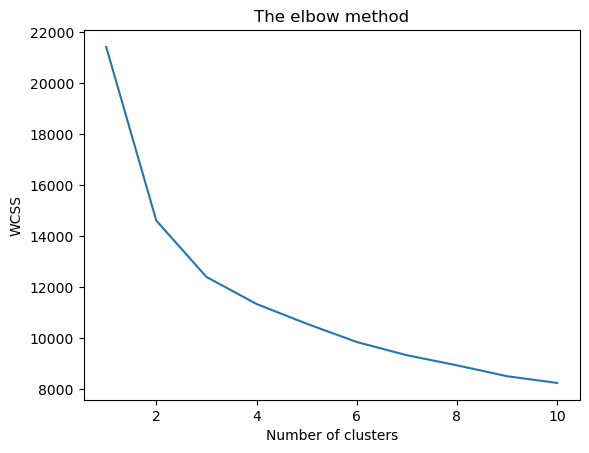

In [15]:
# Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans_bc = KMeans(n_clusters = i, random_state = 0)
    kmeans_bc.fit(X_bc_scaled)
    wcss.append(kmeans_bc.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

#### Silhouette analysis

In [32]:
for k in range(2, 4):
    kmeans_bc = KMeans(n_clusters=k, random_state=0).fit(X_bc_scaled)
    silhouette_avg = silhouette_score(X_bc_scaled, kmeans_bc.labels_)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.30509086830584425
For k = 3 The average silhouette_score is : 0.2908906735706193


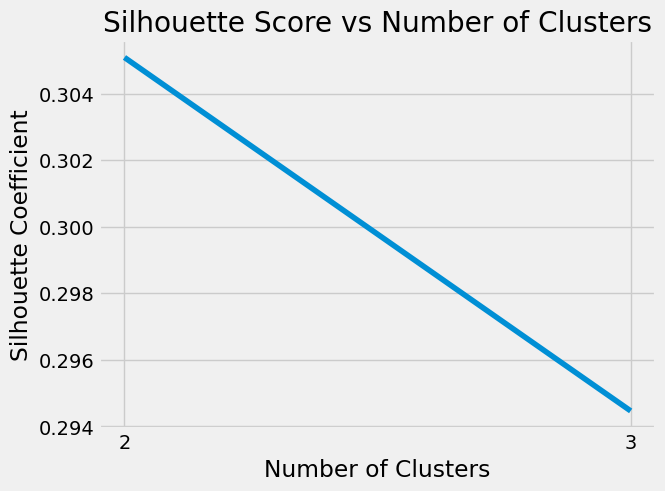

In [33]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 4):
    kmeans_bc = KMeans(n_clusters=k)
    kmeans_bc.fit(X_bc_scaled)
    score = silhouette_score(X_bc_scaled, kmeans_bc.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 4), silhouette_coefficients)
plt.xticks(range(2, 4))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

#### Gap statistic

In [30]:
def gap_statistic(X):
    K = range(1,3)
    meandistortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Create reference datasets
    reference_distortions = []
    for i in range(1, 3):
        X_ref = np.random.random((X.shape[0], X.shape[1]))
        kmeans_ref = KMeans(n_clusters=i, random_state=0).fit(X_ref)
        reference_distortions.append(sum(np.min(cdist(X_ref, kmeans_ref.cluster_centers_, 'euclidean'), axis=1)) / X_ref.shape[0])
        
    # Compute the gap statistic
    gap = np.log(np.array(reference_distortions)) - np.log(np.array(meandistortions))

    return K[np.argmax(gap)], gap

The optimal number of clusters is: 2


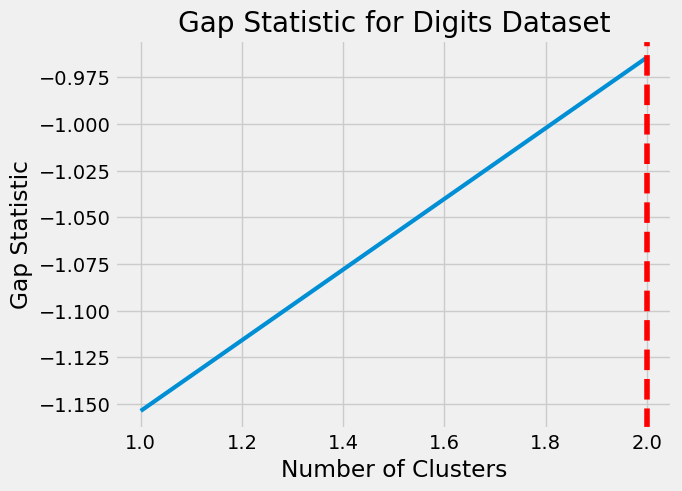

In [31]:
# Determine the optimal number of clusters
optimal_k, gap = gap_statistic(X_bc_scaled)
print("The optimal number of clusters is:", optimal_k)

# Plot the gap statistic
plt.plot(range(1, 3), gap, linewidth=3)
plt.axvline(optimal_k, color='red', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Digits Dataset')
plt.show()

En última instancia, la decisión sobre el número de clústeres a utilizar debe guiarse por una combinación de conocimiento del dominio y de métricas de evaluación del clustering.

En este caso, utilizaremos k = 2, que es el número de clases en el breast_cancer dataset.

In [33]:
k_bc = 2

### K-means

In [48]:
# Classify the data using the KMeans method
    # k-means++:
        # Requiere más tiempo de ejecución que el k-means.
        # En vez de elegir 2 cetroides aleatoriamente, elige un centroide al azar y otro en función del cuadrado de la distancia del primero.
kmeans_bc = KMeans(n_clusters=k_bc, init = 'k-means++', max_iter = 300, n_init = 10, random_state=10)
# Entrenar el algoritmo
kmeans_bc.fit(X_bc_scaled)
# predicción de los valores 
y_pred_bc = kmeans_bc.predict(X_bc_scaled)

In [49]:
# agrupación que ha hecho el kmeans (3 clústers): check cluster assignments
cluster_assignments_bc = kmeans_bc.labels_
cluster_assignments_bc
# or y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [41]:
print(kmeans_bc.cluster_centers_)

[[ 0.73651051  0.39128003  0.76247639  0.71598321  0.53053378  0.81628922
   0.88918724  0.89920563  0.49429378  0.2395888   0.63634265  0.01831292
   0.63430609  0.59509833  0.02681199  0.55407033  0.50376332  0.59994899
   0.0857467   0.35549593  0.78799929  0.41543775  0.80947881  0.74816501
   0.52477375  0.75328371  0.83307209  0.90810543  0.47024976  0.51921451]
 [-0.59144026 -0.31420972 -0.61229165 -0.57495621 -0.4260347  -0.65550498
  -0.7140443  -0.72208937 -0.39693288 -0.19239707 -0.51100243 -0.01470583
  -0.50936701 -0.47788199 -0.02153084 -0.44493526 -0.40453721 -0.48177722
  -0.0688572  -0.285474   -0.63278731 -0.3336091  -0.65003602 -0.60079917
  -0.42140923 -0.60490964 -0.66898213 -0.72923618 -0.37762481 -0.41694498]]


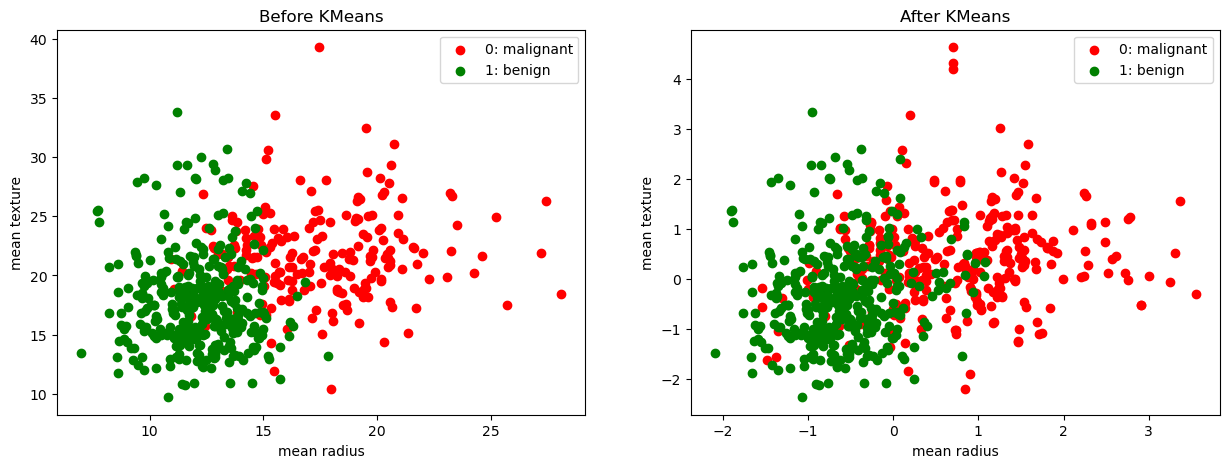

In [64]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot the first two features of the data set before applying KMeans
plt.subplot(1, 2, 1)
plt.scatter(bc.data[bc.target==0, 0], bc.data[bc.target==0, 1], c='red', label='0: malignant')
plt.scatter(bc.data[bc.target==1, 0], bc.data[bc.target==1, 1], c='green', label='1: benign')
plt.xlabel(bc.feature_names[0])
plt.ylabel(bc.feature_names[1])
plt.title("Before KMeans")
plt.legend()

# Plot the first two features of the data set after applying KMeans
plt.subplot(1, 2, 2)
plt.scatter(X_bc_scaled[y_pred_bc==0, 0], X_bc_scaled[y_pred_bc==0, 1], c='red', label='0: malignant')
plt.scatter(X_bc_scaled[y_pred_bc==1, 0], X_bc_scaled[y_pred_bc==1, 1], c='green', label='1: benign')
plt.xlabel(bc.feature_names[0])
plt.ylabel(bc.feature_names[1])
plt.title("After KMeans")
plt.legend()

plt.show()

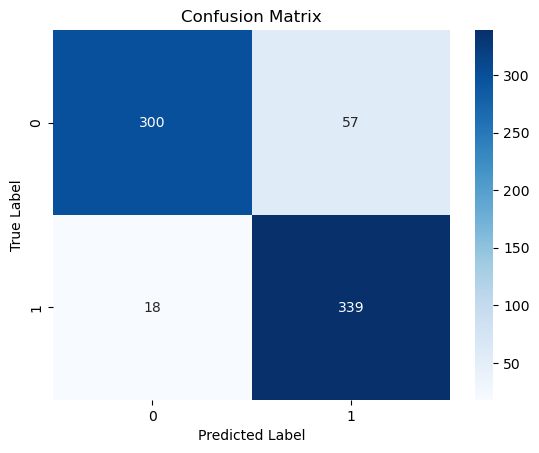

In [65]:
# Confusion matrix
cm = confusion_matrix(y_bc_o, y_pred_bc)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

De la matriz de confusión se observa que:

- 300 muestras que eran realmente "malignas" fueron clasificadas correctamente como "malignas" por el modelo (TN)
- 339 muestras que en realidad eran "benignas" fueron clasificadas correctamente como "benignas" por el modelo (TP).
- 18 muestras que en realidad eran "benignas" fueron clasificadas como "malignas" por el modelo. Se trata de falsos negativos (error de tipo II).
- 57 muestras que en realidad eran "malignas" fueron clasificadas como "benignas" por el modelo. Se trata de falsos positivos (error de tipo I).

In [66]:
print(classification_report(y_bc_o, y_pred_bc))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       357
           1       0.86      0.95      0.90       357

    accuracy                           0.89       714
   macro avg       0.90      0.89      0.89       714
weighted avg       0.90      0.89      0.89       714



- Los resultados del K-means en el breast cancer dataset muestran una accuracy global del 89%. 

- La precisión y la recuperación muestran que el modelo funciona bien en términos de detección de la clase benigna (1) con una recuperación del 95%, mientras que la precisión para la clase maligna (0) es del 94%. La puntuación f1 para ambas clases se acerca al 90%, lo que indica un rendimiento equilibrado.

- En conclusión, el modelo de clustering K-means parece funcionar bien en el breast cancer dataset.

## Digits dataset

Utilizaremos el k-means para identificar dígitos similares sin utilizar la información de la etiqueta original.

In [16]:
# Load dataset from scikit-learn library
digits = datasets.load_digits()

### EDA

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- digits.DESCR es un atributo del objeto del conjunto de datos digits cargado desde la biblioteca scikit-learn, que proporciona una descripción del conjunto de datos.

In [4]:
#Checking the dataset
digits.data.shape

(1797, 64)

In [50]:
# check the targets
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [51]:
# Checking the featues
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [17]:
# Create a pandas dataframe
X_d = pd.DataFrame(digits.data, columns=digits.feature_names)
y_d = pd.DataFrame(digits.target, columns=['target'])

digits_df = pd.DataFrame(X_d, columns=X_d.columns)

# Add target column
digits_df['target'] = y_d

In [58]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [61]:
digits_df.info()
digits_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


- El dataset consta de 1797 muestras con 64 atributos, donde cada uno de los 64 atributos es el brillo de un píxel en una imagen de 8×8.


In [7]:
# Checking data imbalance 
print(digits_df['target'].value_counts()) # recuento de instancias de cada clase en el df

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64


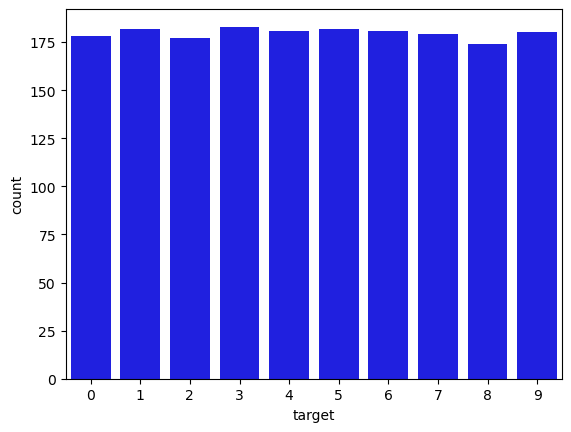

In [63]:
# plot del count
sns.countplot(x = digits_df['target'], color = 'blue')
plt.show()

- Observamos que no hay un desbalanceo muy pronunciado entre clases. 

### Decisión del valor k

Para elegir el valor de k, usaremos 3 métodos:
- the elbow method
- silhouette analysis
- gap statistic

No obstante, en este caso, al ser el número de clases conocido, tendría más sentido utilizar directamente el número conocido de clases (10) como número de clusters.

#### The elbow method

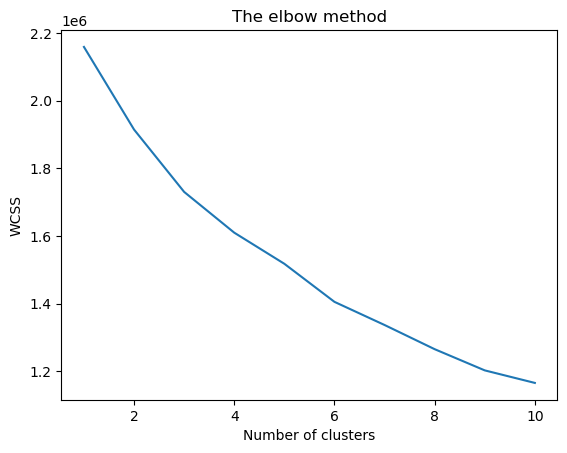

In [74]:
# Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans_d = KMeans(n_clusters = i, random_state = 0)
    kmeans_d.fit(digits.data)
    wcss.append(kmeans_d.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

#### Silhouette analysis

In [9]:
for k in range(2, 12):
    kmeans_d = KMeans(n_clusters=k, random_state=0).fit(digits.data)
    silhouette_avg = silhouette_score(digits.data, kmeans_d.labels_)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.11832841100655983
For k = 3 The average silhouette_score is : 0.1265024495405014
For k = 4 The average silhouette_score is : 0.12806712997190223
For k = 5 The average silhouette_score is : 0.1344590173642148
For k = 6 The average silhouette_score is : 0.15157037416251073
For k = 7 The average silhouette_score is : 0.16209263078121353
For k = 8 The average silhouette_score is : 0.17874216688380912
For k = 9 The average silhouette_score is : 0.18920355881426573
For k = 10 The average silhouette_score is : 0.18251916424600556
For k = 11 The average silhouette_score is : 0.18342390012084134


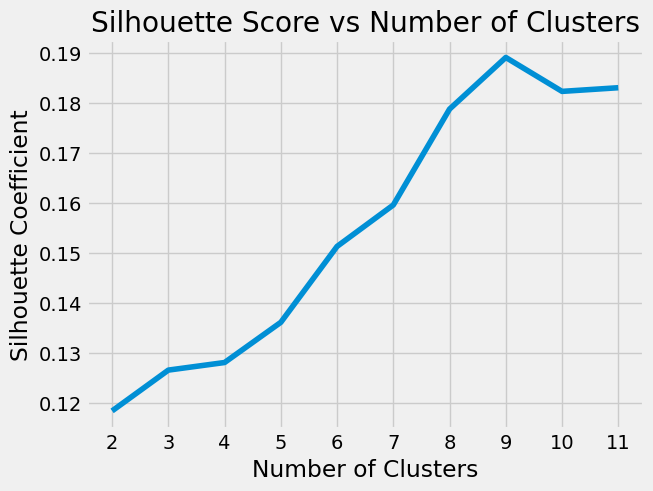

In [10]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 12):
    kmeans_d = KMeans(n_clusters=k)
    kmeans_d.fit(digits.data)
    score = silhouette_score(digits.data, kmeans_d.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

#### Gap statistic

In [13]:
def gap_statistic(X):
    K = range(1,11)
    meandistortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    # Create reference datasets
    reference_distortions = []
    for i in range(1, 11):
        X_ref = np.random.random((X.shape[0], X.shape[1]))
        kmeans_ref = KMeans(n_clusters=i, random_state=0).fit(X_ref)
        reference_distortions.append(sum(np.min(cdist(X_ref, kmeans_ref.cluster_centers_, 'euclidean'), axis=1)) / X_ref.shape[0])
        
    # Compute the gap statistic
    gap = np.log(np.array(reference_distortions)) - np.log(np.array(meandistortions))

    return K[np.argmax(gap)], gap

The optimal number of clusters is: 10


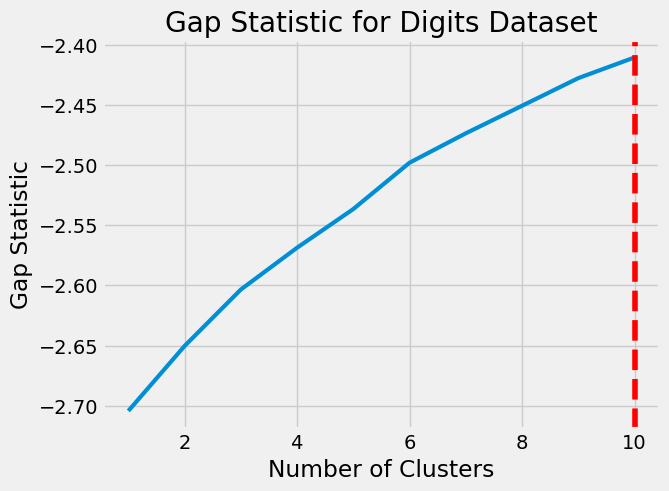

In [14]:
# Determine the optimal number of clusters
optimal_k, gap = gap_statistic(digits.data)
print("The optimal number of clusters is:", optimal_k)

# Plot the gap statistic
plt.plot(range(1, 11), gap, linewidth=3)
plt.axvline(optimal_k, color='red', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Digits Dataset')
plt.show()

En última instancia, la decisión sobre el número de clústeres a utilizar debe guiarse por una combinación de conocimiento del dominio y de métricas de evaluación del clustering.

En este caso, utilizaremos k = 10, que es el número de clases en el breast_cancer dataset.

In [19]:
k = 10

### K-means

In [20]:
kmeans_d = KMeans(n_clusters=k, random_state=0)
clusters = kmeans_d.fit_predict(digits.data)
kmeans_d.cluster_centers_.shape

(10, 64)

- El resultado son 10 clusters en 64 dimensiones. 



¿Qué aspecto tienen los centros de clusters?

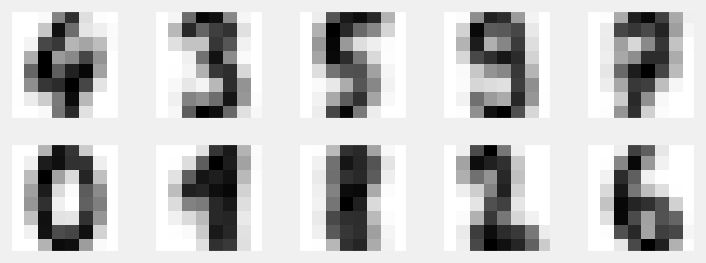

In [106]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_d.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

- Observamos que, exceptuando el 1 y el 8, el k-means encuentra clusters cuyos centros son dígitos reconocibles.

- El algoritmo de clustering k-means es un método de aprendizaje no supervisado. Esto significa que no tiene conocimiento previo de las etiquetas de clase o de la variable objetivo y no lo utiliza para hacer predicciones. En el caso del digits dataset, las etiquetas de clúster asignadas por el algoritmo k-means pueden no corresponder a los dígitos reales (0-9) que representan las instancias. Como resultado, las etiquetas de clúster (0-9) pueden ser diferentes de las etiquetas de clase reales y reordenarse en un orden diferente. Esto significa que las etiquetas de clúster asignadas por k-means no tienen un significado específico y son sólo números arbitrarios asignados a diferentes grupos de instancias. Es decir, no utiliza las etiquetas de clase reales y las etiquetas 0-9 pueden estar permutadas. 

- **Solución**: la idea es tomar las etiquetas de clúster asignadas por el algoritmo k-means y compararlas con las etiquetas de clase reales de las instancias. De esta forma, las etiquetas de los clusters se corresponderán con las etiquetas de clase reales, haciendo que los resultados de la agrupación sean más interpretables y significativos.
     - Por ejemplo, si el algoritmo k-means asigna la etiqueta de cluster "0" a un grupo de instancias que tienen la verdadera etiqueta de clase "5", podemos cambiar la etiqueta de cluster "0" a "5" para que coincida con la verdadera etiqueta de clase. Al hacer esto para todos los clusters, podemos asegurarnos de que las etiquetas de los clusters se corresponden con las etiquetas de clase reales.

In [107]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

/tmp/ipykernel_50549/2407276919.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


- Creamos un nuevo array llamado labels con la misma forma que el array clusters. Este array labels se utilizará para almacenar las etiquetas verdaderas de cada muestra, en función del cluster al que pertenezcan.

- El bucle for itera a través de cada uno de los 10 clusters posibles (0 a 9). En cada iteración, la máscara se crea seleccionando las muestras que pertenecen al cluster actual (es decir, clusters == i). A continuación, se utiliza la función mode de la biblioteca scipy para encontrar la etiqueta verdadera más común (es decir, la moda) de las muestras del clúster actual (digits.target[mask]). El resultado de la función moda es un único valor, que es la etiqueta verdadera del cluster actual. Esta etiqueta se asigna a las muestras correspondientes del array labels.

- Al final del bucle, el array labels contiene las etiquetas verdaderas de cada muestra en función del clúster al que pertenecen.

Métricas de evaluación de la agrupación no supervisada a la hora de encontrar dígitos similares en los datos:


In [23]:
# evaluation metrics
print(classification_report(digits.target, labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.61      0.30      0.40       182
           2       0.85      0.84      0.84       177
           3       0.88      0.84      0.86       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.57      0.50       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.81      0.79      0.79      1797



- A partir de los resultados, podemos ver que la accuracy global de los resultados de la agrupación es de 0.79, lo que significa que el 79% de las instancias del conjunto de datos se clasificaron correctamente. 

- El rendimiento de los resultados del clustering es relativamente bueno para algunos dígitos (por ejemplo, 0, 6 y 7) y relativamente pobre para otros (por ejemplo, 1, 8 y 9). 



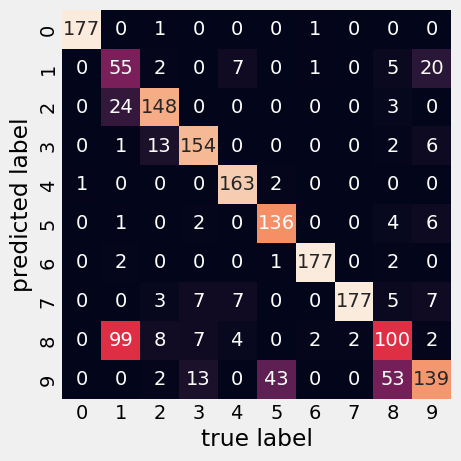

In [110]:
# confusion matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

- Como hemos observado anteriormente, el principal punto de confusión está entre los ochos y los unos. 




En conclusión, los resultados indican que el rendimiento del clustering es relativamente bueno en general, pero que hay margen de mejora para algunos dígitos. Los resultados sugieren que el método de agrupación puede no ser la mejor solución para clasificar los dígitos del conjunto de datos, y que puede merecer la pena explorar otros métodos o técnicas. No obstante, hemos demostrado que el k-means puede construir un clasificador de dígitos sin conocer las etiquetas. 